## Importing Libraries and Data

In [18]:
import os
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.linear_model import Ridge 
rig=Ridge()
from sklearn.linear_model import Lasso
la=Lasso()
from sklearn.linear_model import ElasticNet
en=ElasticNet()
from matplotlib import pyplot as plt
import seaborn as sbn 
%matplotlib inline

In [19]:
df=pd.read_csv('Data/datafile_final.csv')

In [20]:
df.head()

,Order,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,...,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,20,RL,141.0,31770,Pave,Noal,IR1,Lvl,AllPub,...,210,62,0,0,0,5,2010,WD,Normal,215000
1,2,20,RH,80.0,11622,Pave,Noal,Reg,Lvl,AllPub,...,140,0,0,0,120,6,2010,WD,Normal,105000
2,3,20,RL,81.0,14267,Pave,Noal,IR1,Lvl,AllPub,...,393,36,0,0,0,6,2010,WD,Normal,172000
3,4,20,RL,93.0,11160,Pave,Noal,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,60,RL,74.0,13830,Pave,Noal,IR1,Lvl,AllPub,...,212,34,0,0,0,3,2010,WD,Normal,189900


In [21]:
df.drop('Order', axis=1, inplace=True)

# Preprocessing 
### Looking at the distribution of SalePrice
Fixing the skewness of SalePrice also confirming that SalePrice is skewed.  

<AxesSubplot:>

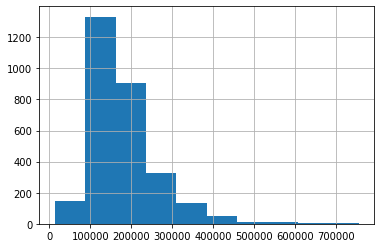

In [23]:
df.SalePrice.hist()

In [24]:
# confirming that the distribution is skewe
resp=df.SalePrice
from scipy.stats import shapiro
shapiro(resp)[1]

2.4102333586386854e-43

Since our shapiro numbber is extremely less than .05 we can determine that the distribution is not normal.  

Taking the square root looks like the best way to correct the skewness

/Users/andreafung/opt/anaconda3/envs/springboard/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

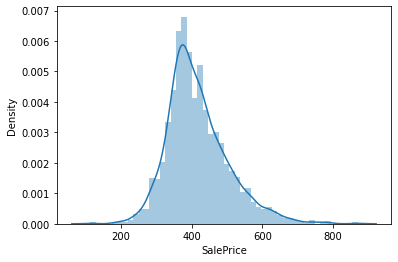

In [25]:
recip=resp**(.5)
sbn.distplot(recip)

In [27]:
df['SalePrice']=recip

In [28]:
df['SalePrice']

0       463.680925
1       324.037035
2       414.728827
3       493.963561
4       435.775171
           ...    
2924    377.491722
2925    361.939221
2926    363.318042
2927    412.310563
2928    433.589668
Name: SalePrice, Length: 2929, dtype: float64

###  Creating Dummie variables
Creating dummie variables with all the categorical variables

Moving SalePrice to the first column

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2929 entries, 0 to 2928
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS.SubClass      2929 non-null   int64  
 1   MS.Zoning        2929 non-null   object 
 2   Lot.Frontage     2929 non-null   float64
 3   Lot.Area         2929 non-null   int64  
 4   Street           2929 non-null   object 
 5   Alley            2929 non-null   object 
 6   Lot.Shape        2929 non-null   object 
 7   Land.Contour     2929 non-null   object 
 8   Utilities        2929 non-null   object 
 9   Lot.Config       2929 non-null   object 
 10  Land.Slope       2929 non-null   object 
 11  Neighborhood     2929 non-null   object 
 12  Condition.1      2929 non-null   object 
 13  Condition.2      2929 non-null   object 
 14  Bldg.Type        2929 non-null   object 
 15  House.Style      2929 non-null   object 
 16  Overall.Cond     2929 non-null   int64  
 17  Year.Built    

In [72]:
ddf=df.copy()

In [73]:
ddf['SalePrice']

0       463.680925
1       324.037035
2       414.728827
3       493.963561
4       435.775171
           ...    
2924    377.491722
2925    361.939221
2926    363.318042
2927    412.310563
2928    433.589668
Name: SalePrice, Length: 2929, dtype: float64

In [74]:
sp=ddf['SalePrice']
ddf.drop(labels=['SalePrice'], axis=1, inplace = True)
ddf.insert(0,'SalePrice',sp)

In [84]:
#changing all objects into categories
ddf[ddf.select_dtypes(['object']).columns] = ddf.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [85]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2929 entries, 0 to 2928
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   SalePrice        2929 non-null   float64 
 1   MS.SubClass      2929 non-null   int64   
 2   MS.Zoning        2929 non-null   category
 3   Lot.Frontage     2929 non-null   float64 
 4   Lot.Area         2929 non-null   int64   
 5   Street           2929 non-null   category
 6   Alley            2929 non-null   category
 7   Lot.Shape        2929 non-null   category
 8   Land.Contour     2929 non-null   category
 9   Utilities        2929 non-null   category
 10  Lot.Config       2929 non-null   category
 11  Land.Slope       2929 non-null   category
 12  Neighborhood     2929 non-null   category
 13  Condition.1      2929 non-null   category
 14  Condition.2      2929 non-null   category
 15  Bldg.Type        2929 non-null   category
 16  House.Style      2929 non-null   category


In [86]:
df_dummie=pd.get_dummies(ddf,drop_first=True)

### Separating x and y variables

In [92]:
# explanatory variable
X=df_dummie.drop(['SalePrice'], axis=1)
# response variable 
y=df_dummie.SalePrice

### Creating Scaler objects

In [93]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()

In [94]:
#creating the scaled X variable
scaled_x=scaler.fit_transform(X)

In [99]:
names=X.columns
scaled_X=pd.DataFrame(scaled_x,columns=names)

## Splitting into training and test datasets

In [100]:
from sklearn.model_selection import train_test_split

#create 1-dimensional flattened array to our response variable
y=y.ravel()

#cal the train_test_split() function with the first two parameters
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.25, random_state=1)